# Sampling Large Risk Assessment Dataset


Analysing different types of data sampling methods.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_1 = pd.read_csv("Polynomial Data/x_11_1_poly.csv")
df_05 = pd.read_csv("Polynomial Data/x_11_05_poly.csv")
df_02 = pd.read_csv("Polynomial Data/x_11_02_poly.csv")
df =pd.concat([df_1,df_05,df_02])
df = df[['Age','Dependents','Annual_income','Monthly_loans','Income_stability','Portfolio_status','Investment_obj','Duration_inv','Comfort','Behaviour','output']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750000 entries, 0 to 1249999
Data columns (total 11 columns):
Age                 float64
Dependents          float64
Annual_income       float64
Monthly_loans       float64
Income_stability    float64
Portfolio_status    float64
Investment_obj      float64
Duration_inv        float64
Comfort             float64
Behaviour           float64
output              float64
dtypes: float64(11)
memory usage: 343.3 MB


In [3]:
df.Age.value_counts()

1.0    1250000
0.2    1250000
0.5    1250000
Name: Age, dtype: int64

In [4]:
df.empty

False

### Correlation matrix for all features in overall dataset

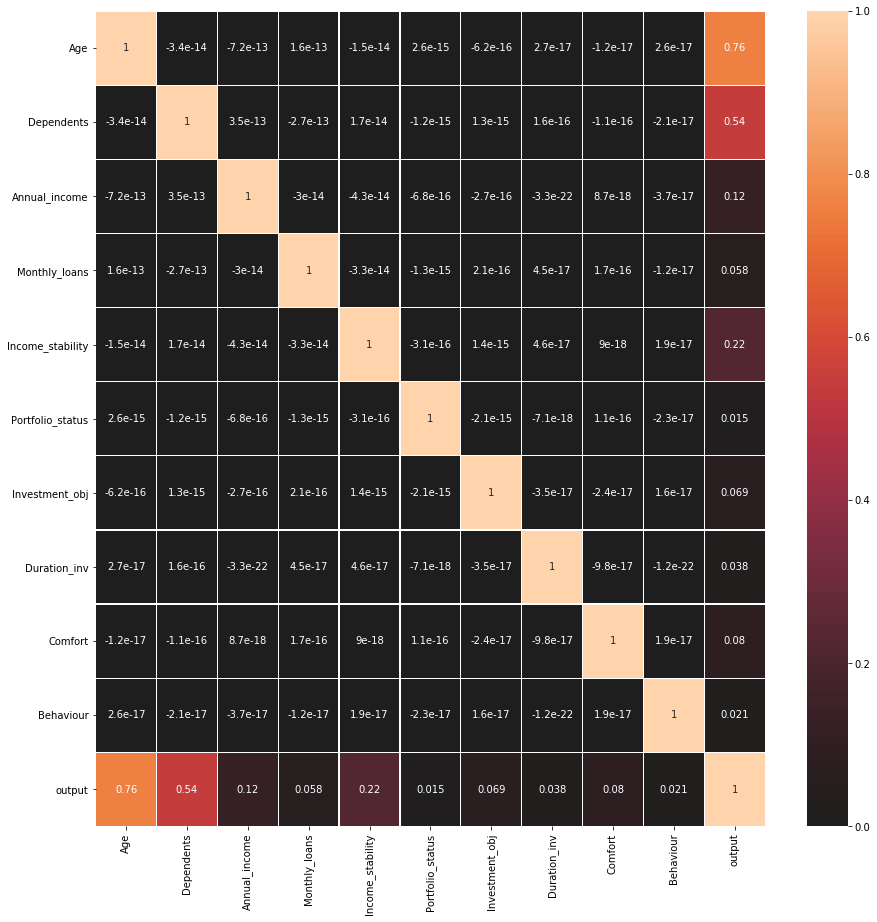

In [6]:
correlation_matrix = df.corr()   
plt.subplots(figsize=(15,15))
sns.heatmap(correlation_matrix, center=0, annot=True, linewidths=.3)

#### This is a vast population size which will most probably lead to model overfitting. I'm going to split the dataset using random sampling and stratififed sampling and then further reduce it by train test split.

The reasoning behind it is that I could discard the first rounds test data since both train and test data will have equal distributions if I try stratified sampling. We could change this strategy if required.

I'm doing random sampling just to compare.

### Stratified Sampling

A stratified sample is one that ensures that subgroups (strata) of a given population are each adequately represented within the whole sample population of a research study.

We need to decide how many categories we should stratify the dataset into, this will be dependent on the target variable/ output variable.

In [7]:
df_correlations = df.corr()
df_correlations['output'].sort_values(ascending=False)

output              1.000000
Age                 0.760992
Dependents          0.541066
Income_stability    0.223878
Annual_income       0.119198
Comfort             0.080217
Investment_obj      0.068785
Monthly_loans       0.058343
Duration_inv        0.037970
Behaviour           0.021368
Portfolio_status    0.015436
Name: output, dtype: float64

In [8]:
df.output.max()

6.740000000000002

In [9]:
df.output.min()

0.39433

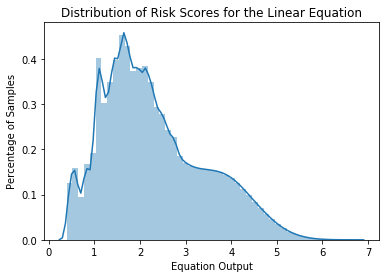

In [10]:
sns.distplot(df.output,label="Distribution of Risk Scores")
plt.title("Distribution of Risk Scores for the Linear Equation")
plt.xlabel("Equation Output")
plt.ylabel("Percentage of Samples")
plt.show()

From the distribution categories will be pretty uneven i.e. the minimum class and maximum class have very few samples compared to the median categories.


### I'm going to make another column, which will have a score 1-5 defining risk categories of users.

Polynomial boundaries:
<br>
1: No risks : observations <= 1.5
<br>        
2: Low risk taker : 1.5 < observations <= 2.5
<br>    
3: Medium risk taker : 2.5 < observations <= 3.5
<br>      
4: Likes to take risks : 3.5 < observations <= 4.5
<br>      
5: High risk taker : 4.5 < observations
<br>
It would be easier to take samples from these classes
<br>

Linear boundaries:
1: No risks : observations <= 2.5
<br>      
2: Low risk taker : 1.5 < observations <= 3.5
<br>        
3: Medium risk taker : 3.5 < observations <= 4.5
<br>       
4: Likes to take risks : 4.5 < observations <= 5.5
<br>       
5: High risk taker : 4.5 < observations

In [14]:
#Creating a new column with same values as output
df = df.assign(categories = df['output'])
#All observations below 1.5 in output column will get marked as category 1
df.loc[df['output'] <= 1.5, 'categories'] = 1
#Observations from 1.5 to 2.3 marked as category 2
df.loc[(df['output'] > 1.5) & (df['output'] <= 2.3) , 'categories'] = 2
#Observations from 2.3 to 3.3 marked as category 3
df.loc[(df['output'] > 2.3) & (df['output'] <= 3.3) , 'categories'] = 3
#Observations from 3.3 to 4.3 marked as category 4
df.loc[(df['output'] > 3.3) & (df['output'] <= 4.3) , 'categories'] = 4
#Observations above 4.3 marked as category 5
df.loc[df['output']>4.3, 'categories'] = 5

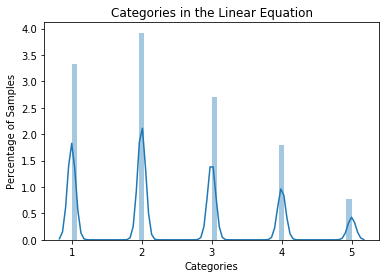

In [15]:
sns.distplot(df.categories)
plt.title("Categories in the Linear Equation")
plt.xlabel("Categories")
plt.ylabel("Percentage of Samples")
plt.show()

#### The counts of each class:

In [11]:
df.categories.value_counts()

3.0    457696
4.0    267753
2.0    252689
1.0     46017
5.0     24420
Name: categories, dtype: int64

Will save this file for future use.

In [13]:
#df.to_csv("risk_data_w_categories_13oct2019.csv")

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=3,test_size=0.3,random_state=42)
for train_index,test_index in split.split(df,df.categories):
    strat_train_set = df.iloc[train_index]
    strat_test_set = df.iloc[test_index]

In [18]:
strat_test_set.head()

,Age,Dependents,Annual_income,Monthly_loans,Income_stability,Portfolio_status,Investment_obj,Duration_inv,Comfort,Behaviour,output,categories
728640,0.2,0.6,0.4,0.4,0.3,0.4,1.0,0.50,0.2,0.2,1.122540,1.0
567846,1.0,0.8,1.0,1.0,0.3,0.4,0.4,0.60,0.1,0.3,3.704280,4.0
925930,1.0,0.6,1.0,0.2,0.1,0.6,0.4,0.65,0.9,0.2,3.220670,3.0
971065,0.5,0.1,0.2,0.6,0.6,0.4,0.5,0.65,0.2,0.2,1.117035,1.0
712903,1.0,0.6,0.4,0.6,0.1,0.4,0.5,0.80,1.0,0.9,3.033080,3.0


#### Variance of stratified divisions

In [19]:
strat_train_set.var()

Age                 0.108914
Dependents          0.111838
Annual_income       0.079976
Monthly_loans       0.079981
Income_stability    0.114981
Portfolio_status    0.022393
Investment_obj      0.041631
Duration_inv        0.010000
Comfort             0.130438
Behaviour           0.101605
output              1.245869
categories          1.434862
dtype: float64

In [20]:
strat_test_set.var()

Age                 0.108831
Dependents          0.111962
Annual_income       0.080055
Monthly_loans       0.080044
Income_stability    0.115045
Portfolio_status    0.022416
Investment_obj      0.041528
Duration_inv        0.010001
Comfort             0.130311
Behaviour           0.101588
output              1.244808
categories          1.434858
dtype: float64

In [21]:
strat_train_set.shape

(2625000, 12)

#### Both test and train sets have equal variance in samples, so I will pick up the test set for further use

In [22]:
strat_test_set.shape

(1125000, 12)

In [23]:
df.shape

(3750000, 12)

Correlations of features in the stratified test set with the target variables.

In [24]:
strat_test = strat_test_set.corr()
strat_test['output'].sort_values(ascending=False)

output              1.000000
categories          0.966746
Age                 0.761121
Dependents          0.541031
Income_stability    0.223495
Annual_income       0.120842
Comfort             0.079115
Investment_obj      0.067944
Monthly_loans       0.057236
Duration_inv        0.039008
Behaviour           0.021372
Portfolio_status    0.016027
Name: output, dtype: float64

In [25]:
#correlation of other variables with target variable
strat_test['categories'].sort_values(ascending=False)

categories          1.000000
output              0.966746
Age                 0.742770
Dependents          0.516709
Income_stability    0.214954
Annual_income       0.109562
Comfort             0.074225
Investment_obj      0.063204
Monthly_loans       0.053320
Duration_inv        0.036067
Behaviour           0.018715
Portfolio_status    0.014864
Name: categories, dtype: float64

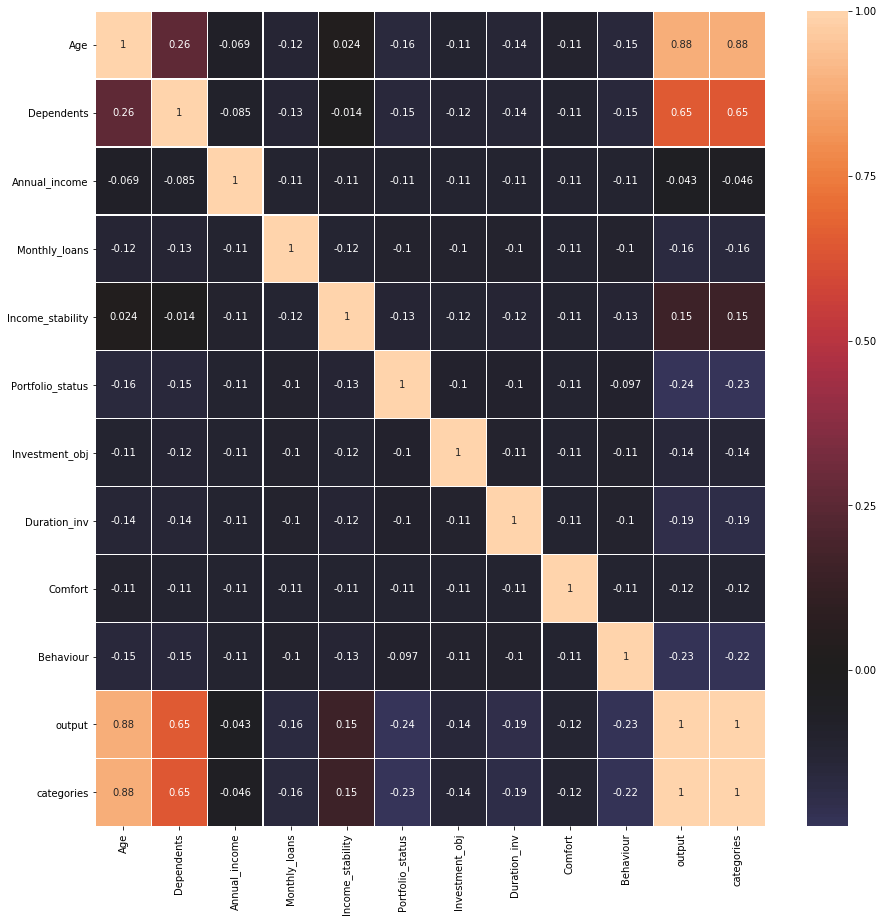

In [26]:
correlation_matrix_strat = strat_test.corr()   #creating a heatmap of the attributes in the dataset
plt.subplots(figsize=(15,15))
sns.heatmap(correlation_matrix_strat, center=0, annot=True, linewidths=.3)

In [28]:
#strat_test_set.to_csv("linear_stratified_sample_27nov2019.csv")

### Categorical Random Sampling

In random sampling I'm reducing the samples taken from largely populated categories such as 2, 3, 4. It's done based on fraction size but we can easily just decide number of samples (we can decide later).

In [29]:
df.loc[df.categories==1].shape

(996032, 12)

In [30]:
category_1 = df.loc[df.categories==1].sample(n=40000)
category_1.shape

(40000, 12)

In [31]:
df.loc[df.categories==2].shape

(1176069, 12)

In [32]:
category_2 = df.loc[df.categories==2].sample(n=40000)
category_2.shape

(40000, 12)

In [33]:
df.loc[df.categories==3].shape

(808223, 12)

In [34]:
category_3 = df.loc[df.categories==3].sample(n=40000)
category_3.shape

(40000, 12)

In [35]:
df.loc[df.categories==4].shape

(536121, 12)

In [36]:
category_4 = df.loc[df.categories==4].sample(n=40000)
category_4.shape

(40000, 12)

In [37]:
df.loc[df.categories==5].shape

(233555, 12)

In [38]:
category_5 = df.loc[df.categories==5].sample(n=40000)
category_5.shape

(40000, 12)

In [39]:
random_sample_df = pd.concat([category_1,category_2,category_3,category_4,category_5])

In [40]:
random_sample_df.shape

(200000, 12)

In [41]:
rand_samples = random_sample_df.corr()

In [42]:
rand_samples['categories'].sort_values(ascending=False)

categories          1.000000
output              0.974377
Age                 0.813175
Dependents          0.598102
Income_stability    0.259789
Annual_income       0.157584
Comfort             0.137855
Investment_obj      0.114901
Monthly_loans       0.094618
Duration_inv        0.066472
Behaviour           0.034421
Portfolio_status    0.023839
Name: categories, dtype: float64

Variance of features in random sample

In [43]:
random_sample_df.var()

Age                 0.113724
Dependents          0.100568
Annual_income       0.080039
Monthly_loans       0.079792
Income_stability    0.118154
Portfolio_status    0.022616
Investment_obj      0.043343
Duration_inv        0.009973
Comfort             0.130704
Behaviour           0.101839
output              1.777052
categories          2.000010
dtype: float64

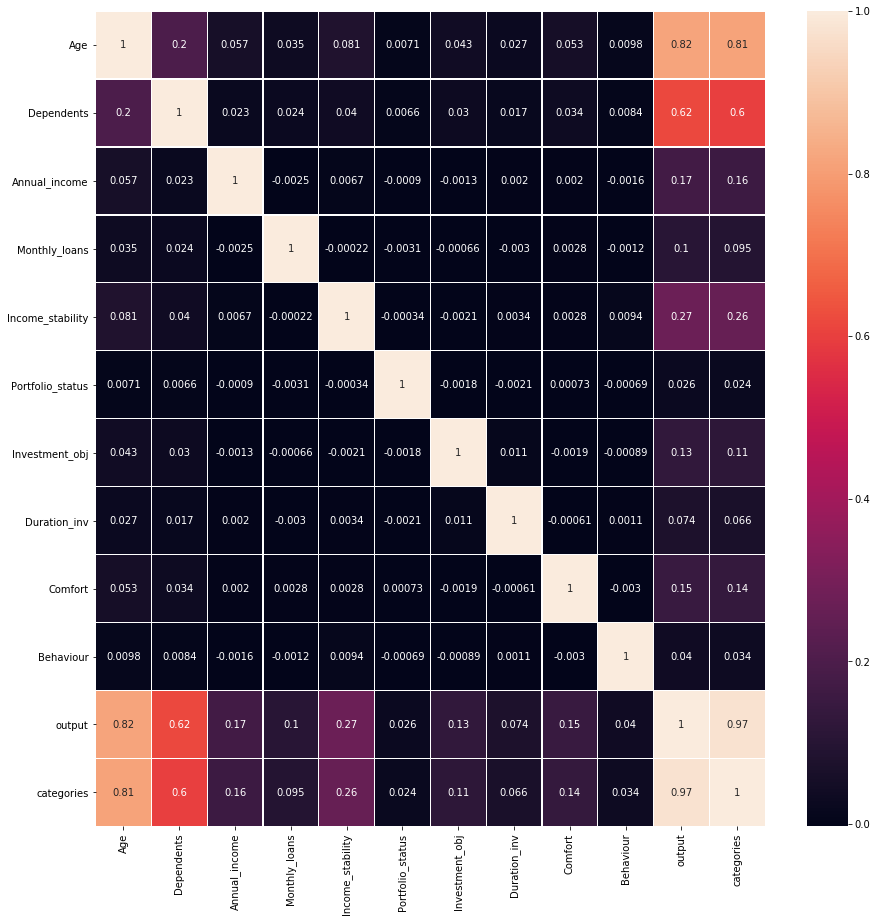

In [44]:
correlation_matrix_rand = random_sample_df.corr()   #creating a heatmap of the attributes in the dataset
plt.subplots(figsize=(15,15))
sns.heatmap(correlation_matrix_rand, annot=True,linewidths=0.3)

Output file.

In [53]:
#random_sample_df.to_csv("risk_cat_random_sample_17oct2019.csv")

### Completely Random Sampling 

In [44]:
X_random = df.drop(columns=['output','categories'])
X_random.head()

,x_11,x_21,x_22,x_31,x_32,x_41,x_51,x_52,x_61,x_62
0,1.0,1.0,0.2,1.0,0.1,0.4,0.65,0.5,1.0,0.2
1,1.0,1.0,0.2,1.0,0.1,0.4,0.65,0.5,1.0,0.3
2,1.0,1.0,0.2,1.0,0.1,0.4,0.65,0.5,1.0,0.5
3,1.0,1.0,0.2,1.0,0.1,0.4,0.65,0.5,1.0,0.9
4,1.0,1.0,0.2,1.0,0.1,0.4,0.65,0.5,1.0,1.0


In [45]:
Y_random = pd.DataFrame(df.categories)
Y_random.head()

,categories
0,4.0
1,4.0
2,4.0
3,4.0
4,4.0


In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X_random,Y_random,random_state=42, test_size=0.1)

In [47]:
X_train.shape

(2831152, 10)

In [48]:
X_test.shape

(314573, 10)

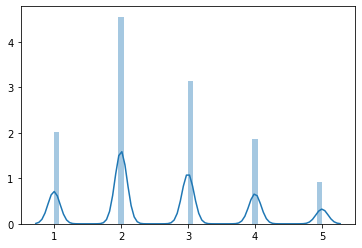

In [49]:
sns.distplot(Y_test)

In [50]:
random_set = pd.concat([X_test, Y_test], axis=1)
random_set.head()

,x_11,x_21,x_22,x_31,x_32,x_41,x_51,x_52,x_61,x_62,categories
830691,0.5,0.4,0.2,0.4,0.1,0.8,0.65,0.65,0.2,0.3,1.0
839783,0.5,0.4,0.2,0.4,0.9,0.4,0.50,0.80,0.9,0.9,2.0
389222,1.0,1.0,1.0,0.2,1.0,0.5,0.50,0.60,0.1,0.5,4.0
205873,0.5,1.0,0.6,0.4,0.1,0.8,0.60,0.70,0.1,0.9,2.0
245113,0.5,1.0,0.8,1.0,0.9,0.5,0.65,0.70,0.5,0.9,3.0


In [52]:
#random_set.to_csv("risk_full_random_sample_17oct19.csv")

#### Should come up with some error measure to test the difference